In [112]:
#Import all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize, RobustScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import scipy.cluster.hierarchy as hc
from sklearn.cluster import AgglomerativeClustering

In [113]:
#read in raw data (replace ... with your own file directory where the data was saved)
df_VAN = pd.read_csv('data/df_neighborhood.csv')
df_VAC = pd.read_csv('data/df_county.csv')
df_VAZ = pd.read_csv('data/df_zipcode.csv')



In [114]:
df_VAC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 59 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      47 non-null     int64  
 1   period_begin                    47 non-null     object 
 2   period_end                      47 non-null     object 
 3   period_duration                 47 non-null     int64  
 4   region_type                     47 non-null     object 
 5   region_type_id                  47 non-null     int64  
 6   table_id                        47 non-null     int64  
 7   is_seasonally_adjusted          47 non-null     object 
 8   region                          47 non-null     object 
 9   city                            0 non-null      float64
 10  state                           47 non-null     object 
 11  state_code                      47 non-null     object 
 12  property_type                   47 non

In [115]:
#Select fields that are of interest
fields=[
'region',
'median_sale_price_yoy',
'homes_sold_yoy',
'new_listings_yoy',
'median_dom',
'avg_sale_to_list',
]

dfn=df_VAN[fields].set_index('region')
dfc=df_VAC[fields].set_index('region')
dfz=df_VAZ[fields].set_index('region')

# df.head()
# dfc.info()
# dfz.head())
dlist=['df','dfc','dfz']


In [116]:
dfz.info()

<class 'pandas.core.frame.DataFrame'>
Index: 205 entries, Zip Code: 22645 to Zip Code: 23803
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   median_sale_price_yoy  205 non-null    float64
 1   homes_sold_yoy         205 non-null    float64
 2   new_listings_yoy       205 non-null    float64
 3   median_dom             205 non-null    float64
 4   avg_sale_to_list       205 non-null    float64
dtypes: float64(5)
memory usage: 9.6+ KB


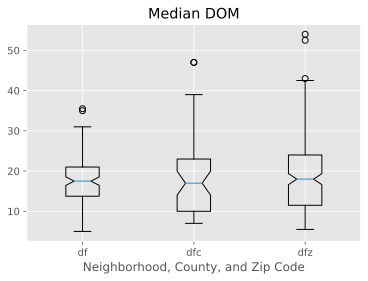

In [117]:

fig, ax= plt.subplots()
ax.boxplot((dfn['median_dom'],dfc['median_dom'],dfz['median_dom']),1)
ax.set(
    title='Median DOM',
    xlabel="Neighborhood, County, and Zip Code",
    xticklabels = dlist
)

plt.show()

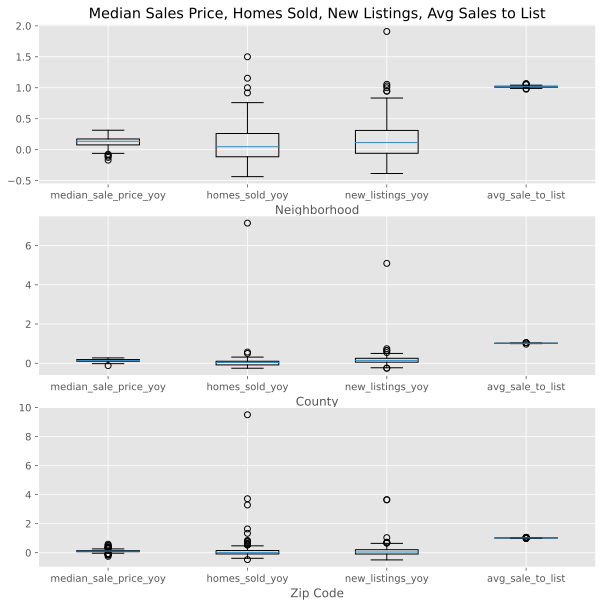

In [118]:

field_list = ['median_sale_price_yoy','homes_sold_yoy','new_listings_yoy', 'avg_sale_to_list']
fig, axs = plt.subplots(3,figsize=(10,10))
axs[0].boxplot(dfn[field_list])
axs[0].set(
    title='Median Sales Price, Homes Sold, New Listings, Avg Sales to List',
    xlabel="Neighborhood",
    xticklabels = field_list
)
axs[1].boxplot(dfc[field_list])
axs[1].set(
    # title='Median Sales Price, Homes Sold, New Listings, Avg Sales to List',
    xlabel="County",
    xticklabels = field_list
)
axs[2].boxplot(dfz[field_list])
axs[2].set(
    # title='Median Sales Price, Homes Sold, New Listings, Avg Sales to List',
    xlabel="Zip Code",
    xticklabels = field_list
)
# fig.subplots_adjust(left=0.075, right=0.95, top=0.9, bottom=0.25)
plt.show()

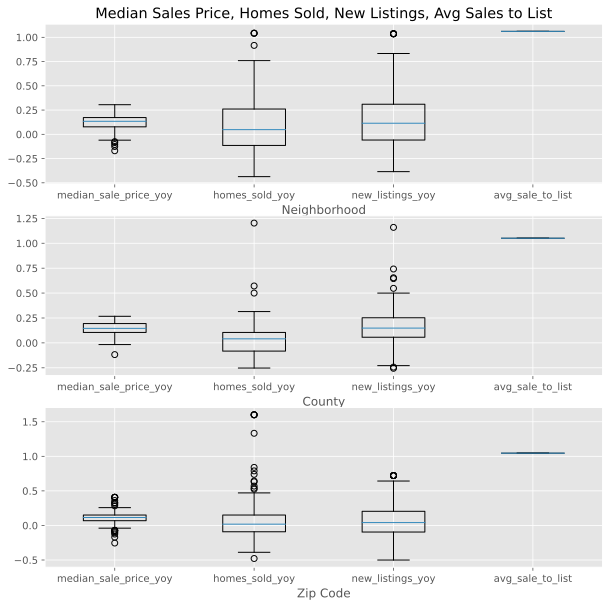

In [120]:
def fix_outliers(df):
    for col in df.columns:
        percentiles = df[col].quantile([0.00,0.985]).values 
        thresh = percentiles[1]
        df[col]=np.where(df[col]>= thresh-(thresh*.1), thresh, df[col])

fix_outliers(dfn)
fix_outliers(dfc)
fix_outliers(dfz)

field_list = ['median_sale_price_yoy','homes_sold_yoy','new_listings_yoy', 'avg_sale_to_list']
fig, axs = plt.subplots(3,figsize=(10,10))
axs[0].boxplot(dfn[field_list])
axs[0].set(
    title='Median Sales Price, Homes Sold, New Listings, Avg Sales to List',
    xlabel="Neighborhood",
    xticklabels = field_list
)
axs[1].boxplot(dfc[field_list])
axs[1].set(
    # title='Median Sales Price, Homes Sold, New Listings, Avg Sales to List',
    xlabel="County",
    xticklabels = field_list
)
axs[2].boxplot(dfz[field_list])
axs[2].set(
    # title='Median Sales Price, Homes Sold, New Listings, Avg Sales to List',
    xlabel="Zip Code",
    xticklabels = field_list
)
plt.show()

In [121]:
df = name = dfc


In [122]:
#Scale all the features using min-max scaler
minmax_scaler=MinMaxScaler()
scaled_features=minmax_scaler.fit_transform(df)



array([0.46894829, 0.31384815, 0.16754393, 0.04965963, 0.        ])

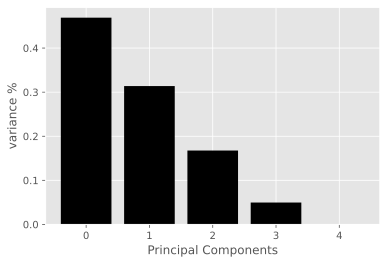

In [123]:
import matplotlib
%matplotlib inline
%config InlineBackend.figure_format='svg'
import matplotlib.pyplot as plt
plt.style.use('ggplot')

minmax_scaler=MinMaxScaler()
scaled_features=minmax_scaler.fit_transform(df)

#Create a PCA instance
pca=PCA(n_components=5)
principalComponents=pca.fit_transform(scaled_features)

#Plot the expained variaces
features=range(pca.n_components_)
plt.bar(features,pca.explained_variance_ratio_,color='black')
plt.xlabel("Principal Components")
plt.ylabel('variance %')
plt.xticks(features)

#Save components to a dataframe
PCA_components=pd.DataFrame(principalComponents)

#Show the expained variance by each principal component
pca.explained_variance_ratio_

In [124]:
weights = pca.components_
print(df.columns)
print(weights)

Index(['median_sale_price_yoy', 'homes_sold_yoy', 'new_listings_yoy',
       'median_dom', 'avg_sale_to_list'],
      dtype='object')
[[-0.4778645   0.3339696   0.24665026 -0.77412756 -0.        ]
 [-0.23805957  0.42970427  0.67700484  0.54803862 -0.        ]
 [-0.84547239 -0.32096643 -0.32114087  0.28111482 -0.        ]
 [-0.01223155  0.77511232 -0.61457028  0.14613231  0.        ]
 [ 0.          0.          0.          0.          1.        ]]


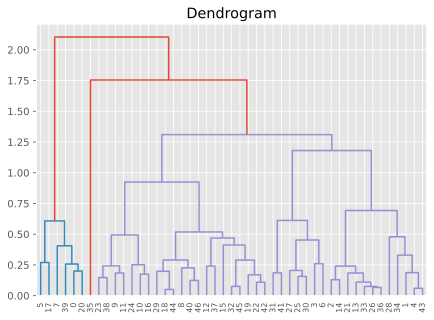

In [125]:

#Create a dendrogram using hierarchical clustering
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(7, 5))  
plt.title("Dendrogram")  
dend = shc.dendrogram(shc.linkage(PCA_components, method='ward'))

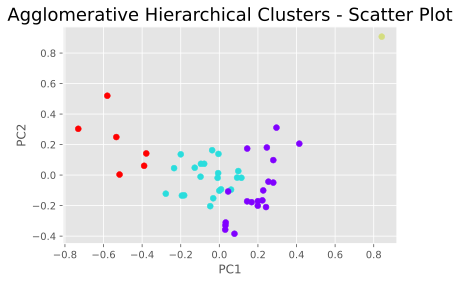

In [126]:
#plot scatter plot
agc = AgglomerativeClustering(n_clusters = 4)
plt.figure(figsize=(6, 4))
plt. scatter(PCA_components[0],PCA_components[1], c = agc.fit_predict(PCA_components), cmap ='rainbow')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt. title ('Agglomerative Hierarchical Clusters - Scatter Plot', fontsize = 18)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

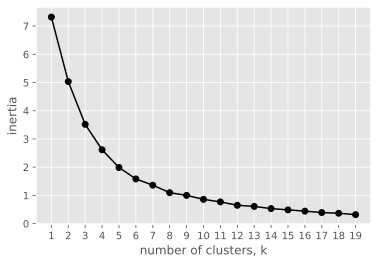

In [127]:

#Elbow method
ks=range(1,20)
inertias=[]
for k in ks:
    model=KMeans(n_clusters=k)
    model.fit(PCA_components.iloc[:,:3]) #we only use the first 3 principal components
    inertias.append(model.inertia_)
    
plt.plot(ks,inertias, '-o',color='black')    
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show

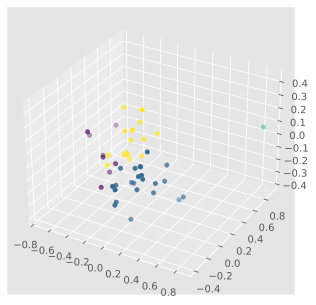

In [128]:
#plot 3-D scatter plot
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
kmeans=KMeans(n_clusters=4, init='k-means++',random_state=42)
kmeans.fit(PCA_components.iloc[:,:3])
labels=kmeans.predict(PCA_components.iloc[:,:3])

fig = pyplot.figure()
ax = Axes3D(fig,auto_add_to_figure=False)
fig.add_axes(ax)
ax.scatter(PCA_components[0],PCA_components[1],PCA_components[2],c=labels)
pyplot.show()

In [131]:
#Add cluster labels to the original dataset and export to csv file
df_VAC['cluster_nbr']=kmeans.labels_
df_VAC_clusters=pd.concat([df_VAC.reset_index(drop=True),pd.DataFrame(principalComponents)],axis=1)
df_VAC_clusters.to_csv('resource/df_countyC.csv')

In [132]:
df_VAC_clusters.head()

,Unnamed: 0,period_begin,period_end,period_duration,region_type,region_type_id,table_id,is_seasonally_adjusted,region,city,...,off_market_in_two_weeks_yoy,parent_metro_region,parent_metro_region_metro_code,last_updated,cluster_nbr,0,1,2,3,4
0,6803,2021-07-01,2021-07-31,30,county,5,3002,f,"Orange County, VA",NaN,...,0.090690,Virginia nonmetropolitan area,NaN,2022-01-09 14:29:56,0,-0.378731,0.141943,-0.206074,0.016284,-0.0
1,16181,2021-07-01,2021-07-31,30,county,5,3042,f,"Fairfax City County, VA",NaN,...,-0.061688,"Washington, DC",47894.0,2022-01-09 14:29:56,1,0.031674,-0.329282,-0.169076,0.122726,-0.0
2,18476,2021-07-01,2021-07-31,30,county,5,2965,f,"Fairfax County, VA",NaN,...,-0.034856,"Washington, DC",47894.0,2022-01-09 14:29:56,1,0.227440,-0.100480,0.174530,-0.017129,-0.0
3,28014,2021-07-01,2021-07-31,30,county,5,3055,f,"Newport News, VA",NaN,...,0.091371,"Virginia Beach, VA",47260.0,2022-01-09 14:29:56,3,0.144388,0.173871,0.183946,-0.135481,-0.0
4,32101,2021-07-01,2021-07-31,30,county,5,2978,f,"Hanover County, VA",NaN,...,0.004210,"Richmond, VA",40060.0,2022-01-09 14:29:56,1,0.030448,-0.357545,-0.012848,0.092765,0.0
